<a href="https://colab.research.google.com/github/GigiQR99/CV-Class3-Streamlit/blob/main/harness_alg_medicaltext_rqa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HARNESS ALGORITHM (Medical Text Classification)**:

#### **Dataset:** https://www.kaggle.com/datasets/chaitanyakck/medical-text/data

#### **LINK TO KAGGLE**
1. Install Kaggle
2. Download and save Kaggle API in your PC
3. Upload the kaggle.json manually, when prompted
4. Authenticate your Kaggle credentials
5. Download dataset & unzip
---
#### Notes:
❌ **Do not share your Kaggle API**

✅ **Save you API key kaggle.json**

In [1]:
# ✅ Step 1: Install Kaggle
!pip install kaggle -qqq

# ✅ Step 2: Upload kaggle.json manually
from google.colab import files
files.upload()  # Choose the kaggle.json file from your computer

# ✅ STEP 3: Set up the Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ✅ Step 4: Download the Medical Text dataset
!kaggle datasets download -d chaitanyakck/medical-text

# ✅ Step 5: Unzip the dataset
!unzip -o medical-text.zip


Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/chaitanyakck/medical-text
License(s): CC0-1.0
medical-text.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  medical-text.zip
  inflating: test.dat                
  inflating: train.dat               


## **PART 1: INSTALL & IMPORT PACKAGES & Libraries**

* **Installs  gradient boosting ML libraries** for classification & regression (XGBoost, LightGBM, and CatBoost), **scickit-learn, pandas & graphic libraries** into the env, using -qqq` **"quiet mode"** installation.


In [2]:
# ============================================================
# PACKAGE INSTALLATIONS (Run 1st, once, "-quietly")
# ============================================================
!pip install xgboost lightgbm catboost nltk scikit-learn pandas matplotlib seaborn -qqq

### 1.1 BASIC LIBRARIES FOR TEXT PRE-PROCESSING & CLEANING

In [3]:
# ========================
# BASIC LIBRARY IMPORTS
# ========================
import os

# Standard Library imports (TEXT PRE-PROCESSING)
import re               # Regular Expression: strings manipulation
import string           # Text transforming & cleaning

# Python Library imports (DATA PROCESSING & VISUALIZATION)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

### 1.2 ADDITIONAL 3rd-PARTY LIBRARIES

 ✅ **Always** run the **`nltk.download()`** in **Colab**.

✅ **`nltk.dowload('punkt_tab')`** instead of "punkt". Newer & safer version: No security risk & pickle files as punkt did.

In [4]:
# =============================================================================
# NLTK import for TEXT PRE-PROCESSING (Collab differs to Kaggle in this part)
# =============================================================================

import nltk
nltk.download('punkt_tab')        # Tokenization
nltk.download('stopwords')        # Stopwords
nltk.download('wordnet')          # For WordNetLemmatizer
nltk.download('omw-1.4')          # Lemmatizer synonyms Open Multilingual WordNet v1.4 package

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# ==============================================
# IMPORT SCIKIT LEARN library for DATA ANALYSIS
# ==============================================
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# ==============================================
# Gradient boosting libraries
# ==============================================
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **PART 2: Load & Training Dataset EDA**
> 1. Add labels: `text` & `label` (1: neoplasms, 2: gastroenterology, 3: CNS, 4: Cardiology, 5: others)
> 2. Identify missing/nulls & duplicates
> 3. EDA

## **PART 2:** Dataset Loading  & EDA
> #### Traning df: 17.81MB dataset (**train.dat**)

In [5]:
# 2.1. LOAD TRAINING DATASET
df_train= pd.read_csv('train.dat', sep='\t', header=None, names=['label', 'text'])
df_train.head(3)

,label,text
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...


In [6]:
# ========================================
# 2.2 BASIC INFO: shape & classes frequencies
# ========================================
print("="*60)
print("📊 MEDICAL TEXT TRAIN DATASET")
print("="*60)
print(df_train.head())
print(f"\nTrain shape: {df_train.shape}")
print(f"\nClass distribution:")
print(df_train['label'].value_counts())
print(f"\nUnique classes: {df_train['label'].unique()}")

# ========================================
# 2.3 CHECK MISSINGS & DUPLICATES values
# ========================================
print("\n" + "="*60)
print("🔍 DATA QUALITY CHECK")
print("="*60)
print(f"Missing values:\n{df_train.isnull().sum()}")
print(f"\nDuplicates: {df_train.duplicated().sum()}")


📊 MEDICAL TEXT TRAIN DATASET
   label                                               text
0      4  Catheterization laboratory events and hospital...
1      5  Renal abscess in children. Three cases of rena...
2      2  Hyperplastic polyps seen at sigmoidoscopy are ...
3      5  Subclavian artery to innominate vein fistula a...
4      4  Effect of local inhibition of gamma-aminobutyr...

Train shape: (14438, 2)

Class distribution:
label
5    4805
1    3163
4    3051
3    1925
2    1494
Name: count, dtype: int64

Unique classes: [4 5 2 1 3]

🔍 DATA QUALITY CHECK
Missing values:
label    0
text     0
dtype: int64

Duplicates: 0


In [7]:
# ========================================
# 2.4 CREATE LABEL_CONDITION dictionary
# ========================================
label_to_condition = {
    1: 'Neoplasms',
    2: 'Gastroenterology',
    3: 'CNS',
    4: 'Cardiology',
    5: 'Others'
}

# Create a readable label column
df_train['condition'] = df_train['label'].map(label_to_condition)

# Display updated dataframe
print("="*60)
print("📊  ABSTRACTS BY CLINICAL SPECIALTIES")
print("="*60)
print(df_train[['label', 'condition', 'text']].head())

# ========================================
# DISPLAY CLASS DISTRIBUTION with names
# ========================================
print("\n" + "="*60)
print("📈 CLASS DISTRIBUTION")
print("="*60)

# Get value counts
counts = df_train['condition'].value_counts().sort_index()
percentages = (counts / counts.sum() * 100).round(2)

# Create a combined display
distribution_df = pd.DataFrame({
    'Condition': counts.index,
    'Count': counts.values,
    'Percentage': percentages.values
})

distribution_df['Percentage'] = distribution_df['Percentage'].apply(lambda x: f"{x}%")

print(distribution_df.to_string(index=False))

# Total
print(f"\nTotal samples: {counts.sum()}")


📊  ABSTRACTS BY CLINICAL SPECIALTIES
   label         condition                                               text
0      4        Cardiology  Catheterization laboratory events and hospital...
1      5            Others  Renal abscess in children. Three cases of rena...
2      2  Gastroenterology  Hyperplastic polyps seen at sigmoidoscopy are ...
3      5            Others  Subclavian artery to innominate vein fistula a...
4      4        Cardiology  Effect of local inhibition of gamma-aminobutyr...

📈 CLASS DISTRIBUTION
       Condition  Count Percentage
             CNS   1925     13.33%
      Cardiology   3051     21.13%
Gastroenterology   1494     10.35%
       Neoplasms   3163     21.91%
          Others   4805     33.28%

Total samples: 14438


Text(0.77, 0.67, 'This dataset contains abstracts\nfrom five clinical categories:\n\n1. Neoplasms\n2. Gastroenterology\n   (digestive system diseases)\n3. CNS (nervous system diseases)\n4. Cardiology\n   (cardiovascular diseases)\n5. Others\n   (general pathological conditions)')

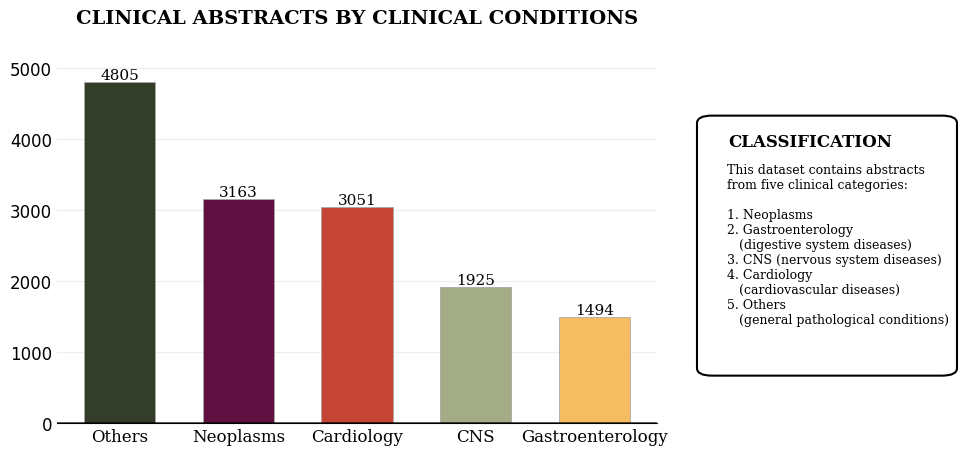

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# =======================================
# LABEL NUMBERS BY CONDITIONS
# =======================================
label_to_condition = {
    1: 'Neoplasms',
    2: 'Gastroenterology',
    3: 'CNS',
    4: 'Cardiology',
    5: 'Others'
}

df_train['condition_name'] = df_train['label'].map(label_to_condition)
data = df_train['condition_name'].value_counts().sort_values(ascending=False)

# BAR COLORS
color_mapping = {
    'Neoplasms': '#5f0f40',
    'Gastroenterology': '#f6bd60',
    'Cardiology': '#c44536',
    'CNS': '#a4ac86',
    'Others': '#333d29'
}

colors = [color_mapping[cond] for cond in data.index]

# =========================
# CREATE PLOT FIGURE
# =========================
fig = plt.figure(figsize=(10, 5))
ax = plt.axes([0.1, 0.15, 0.6, 0.75])

# Plot bars
bars = ax.bar(range(len(data)), data.values, width=0.6,
              edgecolor='darkgray', linewidth=0.6, color=colors)

# Add count labels
for i, count in enumerate(data.values):
    ax.annotate(f"{count}",
                xy=(i, count + max(data.values) * 0.02),
                va='center', ha='center',
                fontweight='light', fontfamily='serif', fontsize=11)

# Remove borders
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# X-axis labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0, ha='center', fontsize=12)

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.4, color='lightgray')
ax.set_ylim(0, max(data.values) * 1.1)
ax.set_axisbelow(True)

# Thick baseline
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12, length=0)

# Centered title
fig.text(0.4, 0.95, 'CLINICAL ABSTRACTS BY CLINICAL CONDITIONS',
         fontsize=14, fontweight='bold', fontfamily='serif', ha='center')

# =========================
#  DRAW LEGEND BOX
# =========================
from matplotlib.patches import FancyBboxPatch

# Draw rounded legend box FIRST (so it appears behind text)
# ---------------------------------------------------------
legend_box = FancyBboxPatch((0.755, 0.26), 0.23, 0.49,
                           boxstyle="round,pad=0.015",
                           transform=fig.transFigure,
                           facecolor='white', edgecolor='black',
                           linewidth=1.5, clip_on=False, zorder=1)
fig.patches.append(legend_box)

# Legend title - BOLD & CENTERED
# -------------------------------
fig.text(0.853, 0.73, 'CLASSIFICATION',
         fontsize=12, fontweight='bold', fontfamily='serif',
         ha='center', va='top', zorder=2)

# Legend LEFT aligned
# -------------------------------
legend_body = '''This dataset contains abstracts
from five clinical categories:

1. Neoplasms
2. Gastroenterology
   (digestive system diseases)
3. CNS (nervous system diseases)
4. Cardiology
   (cardiovascular diseases)
5. Others
   (general pathological conditions)'''

fig.text(0.77, 0.67, legend_body,
         fontsize=9, fontfamily='serif',
         ha='left', va='top', zorder=2,
         multialignment='left')


#### **FancyBboxPatch ((0.755, 0.26), 0.23, 0.49...):**

> * (0.755, 0.26) → x, y coordinates of the lower-left corner of the box, in figure coordinates (0-1 from left to right & bottom to top).
> * 0.23 → box width in figure coordinates (≈ 23% of figure width).
> * 0.50 → box height in figure coordinates (≈ 50% of figure height).

## **PART 3:** Data Normalization & Preprocessing
### **3.1. Text Normalization**


In [9]:
# ===================================================================================================
# 🧹🪣 REMOVE HTML/Tags/URLs, to lower case, remove numbers/punctuation/extra whitespace
# ===================================================================================================

def clean_text(text):
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # 3. Convert to lowercase
    text = text.lower()
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 6. Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply the cleaning function to the text column
df_train['text'] = df_train['text'].apply(clean_text)

# Display cleaned data
print("="*60)
print("🧹🪣 CLEANED TEXT SAMPLES")
print("="*60)
print(df_train[['label', 'condition_name', 'text']].head())

# Check text length after cleaning
df_train['text_length'] = df_train['text'].str.len()
print(f"\nAverage text length: {df_train['text_length'].mean():.0f} characters")
print(f"Min length: {df_train['text_length'].min()}")
print(f"Max length: {df_train['text_length'].max()}")


🧹🪣 CLEANED TEXT SAMPLES
   label    condition_name                                               text
0      4        Cardiology  catheterization laboratory events and hospital...
1      5            Others  renal abscess in children three cases of renal...
2      2  Gastroenterology  hyperplastic polyps seen at sigmoidoscopy are ...
3      5            Others  subclavian artery to innominate vein fistula a...
4      4        Cardiology  effect of local inhibition of gammaaminobutyri...

Average text length: 1167 characters
Min length: 166
Max length: 3871


### **3.2 Pre-Processing**:  DON'T RUN twice! 🛑
> #### 1) Tokenization, 2) Stop Word Removal, 3) Lemmatization

In [10]:
# TOKENIZATION
df_train['text'] = df_train['text'].apply(nltk.word_tokenize)
df_train.head(3)


,label,text,condition,condition_name,text_length
0,4,"[catheterization, laboratory, events, and, hos...",Cardiology,Cardiology,1560
1,5,"[renal, abscess, in, children, three, cases, o...",Others,Others,908
2,2,"[hyperplastic, polyps, seen, at, sigmoidoscopy...",Gastroenterology,Gastroenterology,972


In [11]:
# REMOVE STOP-WORDS
stop_words = set(stopwords.words('english'))
df_train['text'] = df_train['text'].apply(lambda x: [word for word in x if word not in stop_words])

df_train.head(3)

,label,text,condition,condition_name,text_length
0,4,"[catheterization, laboratory, events, hospital...",Cardiology,Cardiology,1560
1,5,"[renal, abscess, children, three, cases, renal...",Others,Others,908
2,2,"[hyperplastic, polyps, seen, sigmoidoscopy, ma...",Gastroenterology,Gastroenterology,972


In [12]:
# LEMMATIZATION
lemmatizer = WordNetLemmatizer()
df_train['text'] = df_train['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokens back into a single string
df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x))
df_train.head(3)

,label,text,condition,condition_name,text_length
0,4,catheterization laboratory event hospital outc...,Cardiology,Cardiology,1560
1,5,renal abscess child three case renal abscess c...,Others,Others,908
2,2,hyperplastic polyp seen sigmoidoscopy marker a...,Gastroenterology,Gastroenterology,972


>### **3.3. WordCloud:** by Category

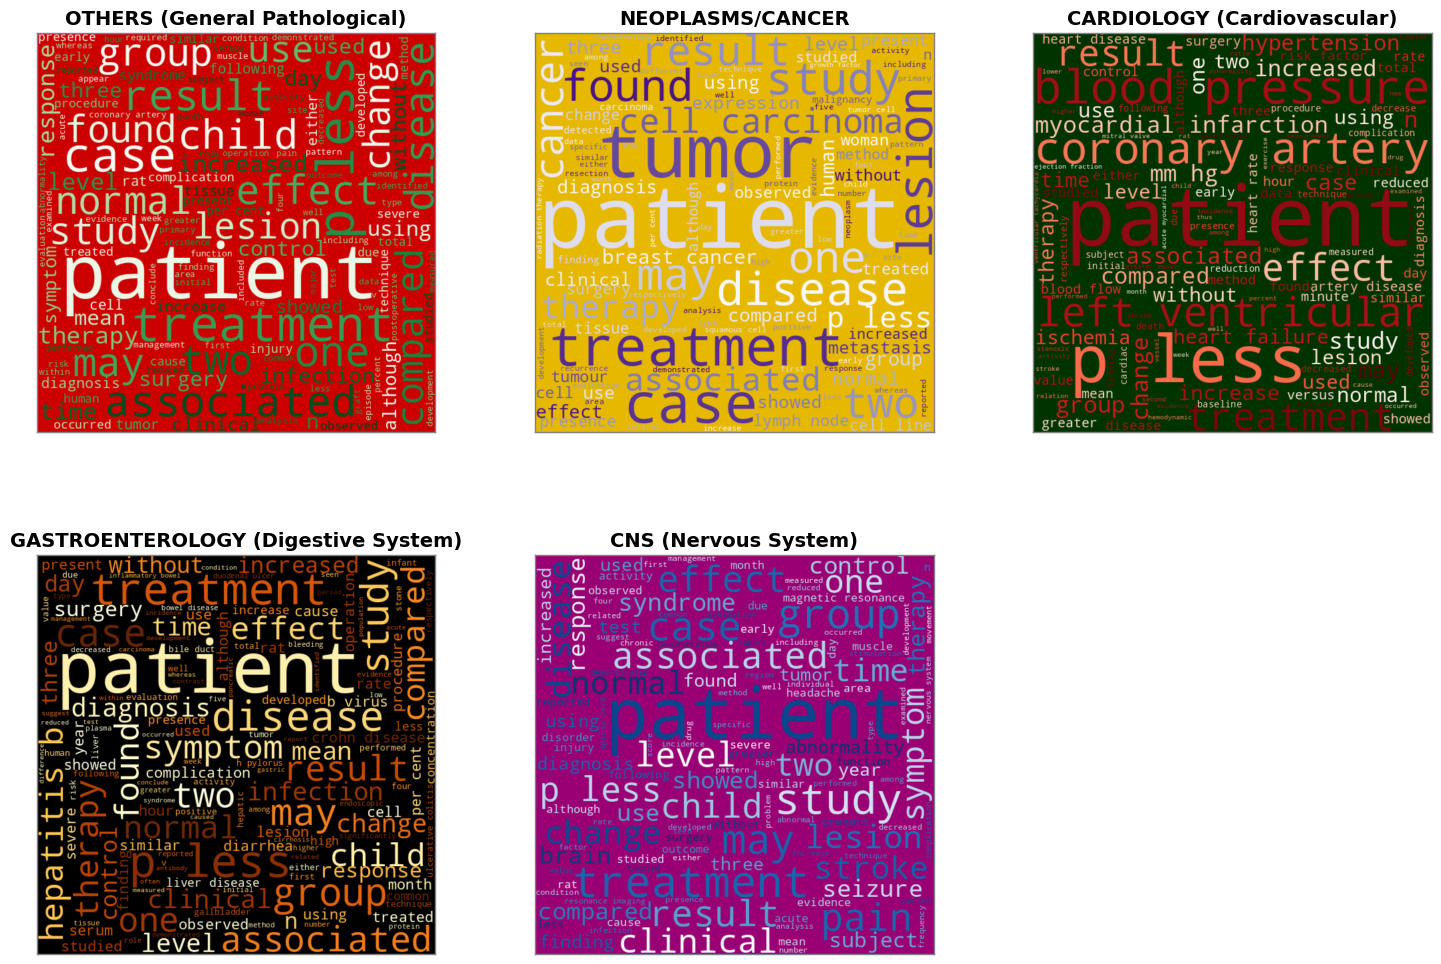

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create 2 rows, 3 columns layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

#=================================
# WordCloud 1: OTHERS
#=================================
others_text = df_train[df_train['condition_name'] == 'Others']['text'].str.cat(sep=' ')
wc_others = WordCloud(width=600, height=600,
                      background_color='#cc0000',
                      colormap='Greens',
                      max_words=150,
                      min_font_size=10).generate(others_text)

axes[0].imshow(wc_others, interpolation='bilinear')
axes[0].set_title('OTHERS (General Pathological)', fontsize=14, fontweight='bold')
axes[0].axis('on')
for spine in axes[0].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)
axes[0].set_xticks([])
axes[0].set_yticks([])

#=================================
# WordCloud 2: NEOPLASMS
#=================================
neoplasms_text = df_train[df_train['condition_name'] == 'Neoplasms']['text'].str.cat(sep=' ')
wc_neoplasms = WordCloud(width=600, height=600,
                         background_color='#e6b800',
                         colormap='Purples',
                         max_words=150,
                         min_font_size=10).generate(neoplasms_text)

axes[1].imshow(wc_neoplasms, interpolation='bilinear')
axes[1].set_title('NEOPLASMS/CANCER', fontsize=14, fontweight='bold')
axes[1].axis('on')
for spine in axes[1].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)
axes[1].set_xticks([])
axes[1].set_yticks([])

#=================================
# WordCloud 3: CARDIOLOGY
#=================================
cardio_text = df_train[df_train['condition_name'] == 'Cardiology']['text'].str.cat(sep=' ')
wc_cardio = WordCloud(width=600, height=600,
                      background_color='#003300',
                      colormap='Reds',
                      max_words=150,
                      min_font_size=10).generate(cardio_text)

axes[2].imshow(wc_cardio, interpolation='bilinear')
axes[2].set_title('CARDIOLOGY (Cardiovascular)', fontsize=14, fontweight='bold')
axes[2].axis('on')
for spine in axes[2].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)
axes[2].set_xticks([])
axes[2].set_yticks([])

#================================
# WordCloud 4: GASTROENTEROLOGY
#================================
gastro_text = df_train[df_train['condition_name'] == 'Gastroenterology']['text'].str.cat(sep=' ')
wc_gastro = WordCloud(width=600, height=600,
                      background_color='black',
                      colormap='YlOrBr',
                      max_words=150,
                      min_font_size=10).generate(gastro_text)

axes[3].imshow(wc_gastro, interpolation='bilinear')
axes[3].set_title('GASTROENTEROLOGY (Digestive System)', fontsize=14, fontweight='bold')
axes[3].axis('on')
for spine in axes[3].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)
axes[3].set_xticks([])
axes[3].set_yticks([])

#================================
# WordCloud 5: CNS
#================================
cns_text = df_train[df_train['condition_name'] == 'CNS']['text'].str.cat(sep=' ')
wc_cns = WordCloud(width=600, height=600,
                   background_color='#990073',
                   colormap='Blues',
                   max_words=150,
                   min_font_size=10).generate(cns_text)

axes[4].imshow(wc_cns, interpolation='bilinear')
axes[4].set_title('CNS (Nervous System)', fontsize=14, fontweight='bold')
axes[4].axis('on')
for spine in axes[4].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)
axes[4].set_xticks([])
axes[4].set_yticks([])

# Remove the 6th empty subplot
fig.delaxes(axes[5])

plt.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()


> ### **3.4. TOP-30 most frequent words:** Across all categories

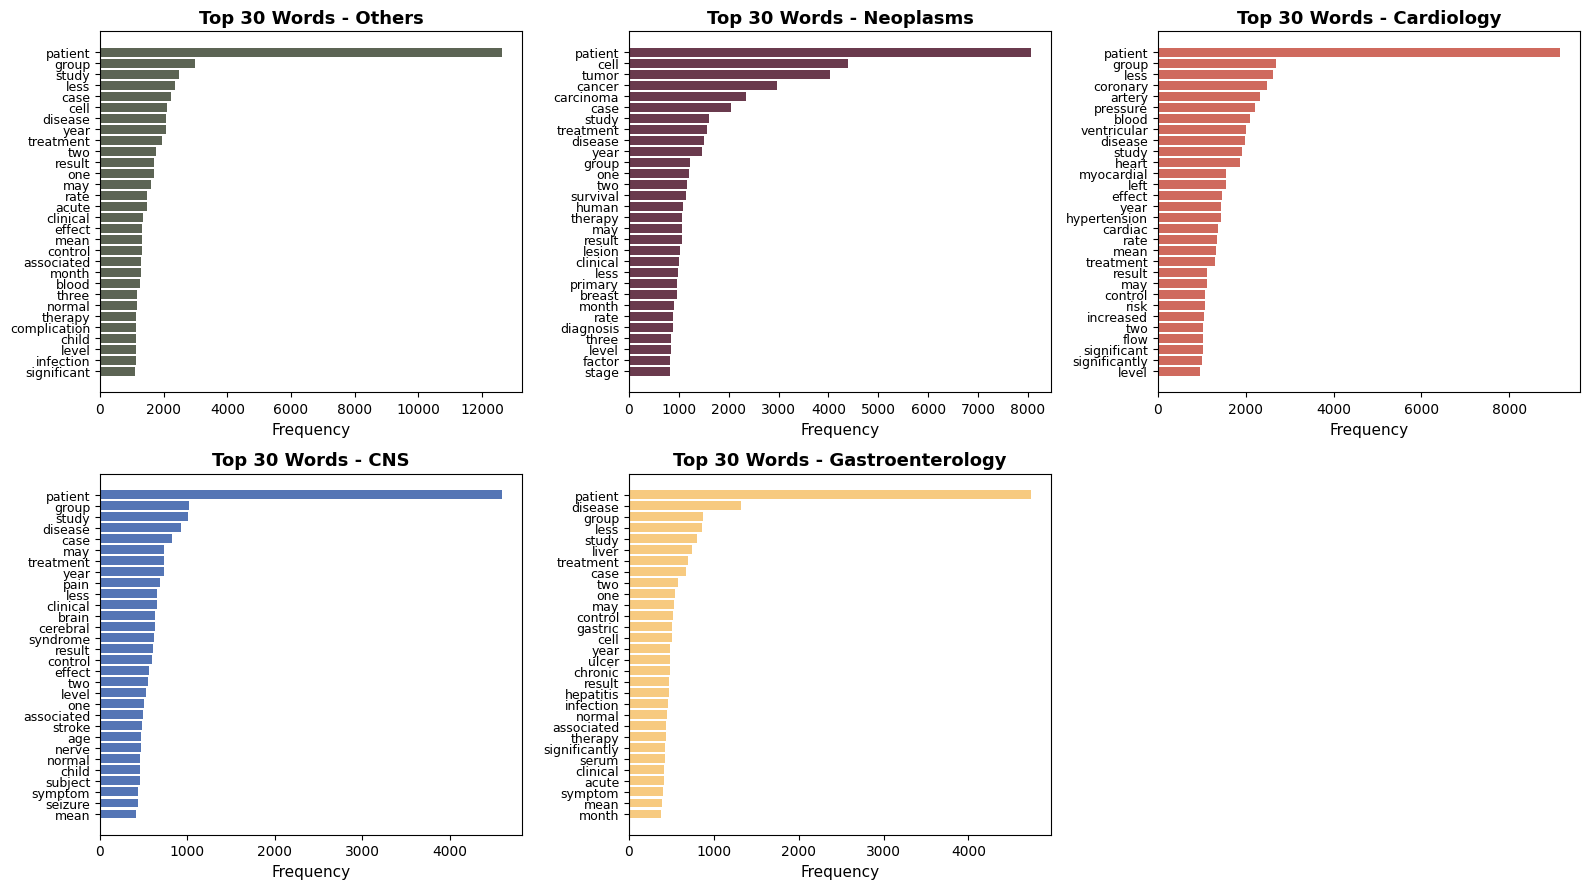

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

#======================================
# TOP-30 WORDS BY CATEGORY | BAR CHART
#======================================
# Define colors for each condition
colors = {
    'Others': '#333d29',
    'Neoplasms': '#450920',
    'Cardiology': '#c44536',
    'CNS': '#2952a3',
    'Gastroenterology': '#f6bd60'
}

# Define conditions
conditions = ['Others', 'Neoplasms', 'Cardiology', 'CNS', 'Gastroenterology']

# Create figure with 5 subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()  # Flatten to make indexing easier

for idx, condition in enumerate(conditions):
    # Get text for this condition
    condition_text = df_train[df_train['condition_name'] == condition]['text'].str.cat(sep=" ").split()

    # Filter words longer than 1 character
    condition_text_filtered = [word for word in condition_text if len(word) > 1]

    # Get top 30 words
    condition_freq = Counter(condition_text_filtered).most_common(30)
    words, counts = zip(*condition_freq)

    # Plot horizontal bar chart
    axes[idx].barh(words, counts, color=colors[condition], alpha=0.8)
    axes[idx].set_xlabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Top 30 Words - {condition}', fontsize=13, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].tick_params(axis='y', labelsize=9)

# Remove the 6th empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


In [15]:
from collections import Counter

#============================================================
# MEDICAL STOPWORDS FREQUENCY ANALYSIS BY CONDITION
#============================================================

# Words to analyze
target_words = ['patient', 'treatment', 'disease', 'study', 'case', 'control',
                'group', 'one', 'two', 'may', 'year',
                'level', 'mean', 'less']

conditions = ['Others', 'Neoplasms', 'Cardiology', 'CNS', 'Gastroenterology']

# Store results for comparison
condition_stats = {}

print("="*80)
print("MEDICAL STOPWORDS FREQUENCY ANALYSIS BY CONDITION")
print("="*80)

for condition in conditions:
    # Get all text for this condition
    condition_df = df_train[df_train['condition_name'] == condition]
    all_text = condition_df['text'].str.cat(sep=' ').split()

    # Count frequencies
    word_counts = Counter(all_text)
    total_words = len(all_text)
    unique_words = len(word_counts)

    # Get frequency ranking (sorted by frequency)
    ranked_words = word_counts.most_common()

    print(f"\n{'='*30}")
    print(f"📊 {condition.upper()}")
    print(f"{'='*30}")
    print(f"   Total words: {total_words:,}")
    print(f"   Unique words: {unique_words:,}")
    print(f"   Number of abstracts: {len(condition_df)}")

    # Analyze each target word
    condition_word_stats = {}
    for word in target_words:
        freq = word_counts[word]
        # Find rank
        rank = next((i+1 for i, (w, c) in enumerate(ranked_words) if w == word), None)
        condition_word_stats[word] = {'frequency': freq, 'rank': rank}

    condition_stats[condition] = {
        'total_words': total_words,
        'unique_words': unique_words,
        'num_abstracts': len(condition_df),
        'word_stats': condition_word_stats
    }

# Print detailed analysis for each word
print("\n" + "="*80)
print("WORD-BY-WORD COMPARISON ACROSS CONDITIONS")
print("="*80)

for word in target_words:
    print(f"\n📌 Word: '{word}'")
    print("-" * 80)

    for condition in conditions:
        freq = condition_stats[condition]['word_stats'][word]['frequency']
        rank = condition_stats[condition]['word_stats'][word]['rank']
        total = condition_stats[condition]['total_words']
        pct = (freq / total * 100) if total > 0 else 0

        print(f"  {condition:20s}: {freq:>6,} times | Rank: #{rank:>4} | {pct:>5.2f}% of words")

    # Find max and min
    freqs = {cond: condition_stats[cond]['word_stats'][word]['frequency'] for cond in conditions}
    max_cond = max(freqs, key=freqs.get)
    min_cond = min(freqs, key=freqs.get)
    ratio = freqs[max_cond] / freqs[min_cond] if freqs[min_cond] > 0 else float('inf')

    print(f"\n  → Most in {max_cond}: {freqs[max_cond]:,} | Least in {min_cond}: {freqs[min_cond]:,}")
    print(f"  → Ratio: {ratio:.2f}x more in {max_cond} than {min_cond}")

print("\n" + "="*80)


MEDICAL STOPWORDS FREQUENCY ANALYSIS BY CONDITION

📊 OTHERS
   Total words: 509,722
   Unique words: 26,772
   Number of abstracts: 4805

📊 NEOPLASMS
   Total words: 331,550
   Unique words: 19,504
   Number of abstracts: 3163

📊 CARDIOLOGY
   Total words: 364,441
   Unique words: 17,071
   Number of abstracts: 3051

📊 CNS
   Total words: 188,081
   Unique words: 15,368
   Number of abstracts: 1925

📊 GASTROENTEROLOGY
   Total words: 160,133
   Unique words: 12,750
   Number of abstracts: 1494

WORD-BY-WORD COMPARISON ACROSS CONDITIONS

📌 Word: 'patient'
--------------------------------------------------------------------------------
  Others              : 12,626 times | Rank: #   1 |  2.48% of words
  Neoplasms           :  8,060 times | Rank: #   1 |  2.43% of words
  Cardiology          :  9,151 times | Rank: #   1 |  2.51% of words
  CNS                 :  4,595 times | Rank: #   1 |  2.44% of words
  Gastroenterology    :  4,736 times | Rank: #   1 |  2.96% of words

  → Most in 

> ### **3.5. Removal specific stop-words:**
> **Most frequent across all classes:** 'patients', 'treatment', 'study', 'case', 'group', 'one', 'two', 'may', 'less'

In [16]:
#==============================================
# Define medical/research stopwords to remove
#==============================================
medical_stopwords = {'patients', 'treatment', 'study', 'case', 'group', 'one', 'two', 'may', 'less'}

# Combine with standard stopwords
all_stopwords = set(stopwords.words('english')).union(medical_stopwords)

# Function to remove stopwords from text
def remove_medical_stopwords(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in all_stopwords]

    # Join back to string
    return ' '.join(tokens)

# Apply to the text column
print("Removing medical stopwords...")
df_train['text'] = df_train['text'].apply(remove_medical_stopwords)

print("✓ Medical stopwords removed")
print(f"\nSample cleaned text:")
print(df_train['text'].head(3))


Removing medical stopwords...
✓ Medical stopwords removed

Sample cleaned text:
0    catheterization laboratory event hospital outc...
1    renal abscess child three renal abscess child ...
2    hyperplastic polyp seen sigmoidoscopy marker a...
Name: text, dtype: object


In [17]:
# Double check removal of medical stopwords
print("="*80)
print("VERIFICATION: Medical Stopwords Removal")
print("="*80)

medical_stopwords_check = {'patients', 'treatment', 'study', 'case', 'group', 'one', 'two', 'may', 'less'}

# Check each word's frequency after removal
all_text_after = ' '.join(df_train['text']).split()
word_counts_after = Counter(all_text_after)

print("\nChecking if stopwords still exist:\n")
for word in medical_stopwords_check:
    count = word_counts_after.get(word, 0)
    status = "❌ STILL PRESENT" if count > 0 else "✅ REMOVED"
    print(f"  '{word}': {count:,} occurrences {status}")



VERIFICATION: Medical Stopwords Removal

Checking if stopwords still exist:

  'patients': 0 occurrences ✅ REMOVED
  'one': 0 occurrences ✅ REMOVED
  'study': 0 occurrences ✅ REMOVED
  'treatment': 0 occurrences ✅ REMOVED
  'less': 0 occurrences ✅ REMOVED
  'may': 0 occurrences ✅ REMOVED
  'case': 0 occurrences ✅ REMOVED
  'group': 0 occurrences ✅ REMOVED
  'two': 0 occurrences ✅ REMOVED


## **4. Feature Engineering** (Text Representation)
> ### **MODEL BUILDING:**
> #### 1) split dataset > 2) initialize TF-IDF > 3) Transform training data >4)  Transform Test

In [18]:

# ***********************
# FEATURING ENGINEERING
# ***********************

# ================================================
#       Separate features (X) and target (y)
# ================================================
X = df_train['text']
y = df_train['label']  # Using numeric labels (1-5)

# ================================================
# 1) SPLIT DATA into  TRAINING & TESTING sets
# ================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("="*60)
print("📊 TRAIN/TEST SPLIT")
print("="*60)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# ============================================================================
# 2) Initialize TF-IDF Vectorizer (Top 10000 +freq words, bigrams, red noise)
# ============================================================================
#  Added min/max_df filters
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,      # Top 10000 +freq words to capture more medical terms
    ngram_range=(1, 2),      # Bigrams
    min_df=3,                # Ignore terms appearing in < 3 documents (reduces noise)
    max_df=0.9               # Ignore terms in >90% of documents (removes remaining stopwords)
)

# ================================================
# 3) Transform the Training data
# ================================================
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# ================================================
# 4) Transform the testing data (DO NOT fit again)
# ================================================
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\n" + "="*60)
print("🔢 TF-IDF FEATURE ENGINEERING")
print("="*60)
print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Test TF-IDF shape: {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf_vectorizer.get_feature_names_out())}")



📊 TRAIN/TEST SPLIT
Training set size: 11550
Test set size: 2888

Training set class distribution:
label
1    2530
2    1195
3    1540
4    2441
5    3844
Name: count, dtype: int64

Test set class distribution:
label
1    633
2    299
3    385
4    610
5    961
Name: count, dtype: int64

🔢 TF-IDF FEATURE ENGINEERING
Training TF-IDF shape: (11550, 10000)
Test TF-IDF shape: (2888, 10000)
Number of features: 10000


In [ ]:
'''
# ***********************
# FEATURING ENGINEERING
# ***********************


# Separate features (X) and target (y)
# ====================================
X = df_train['text']
y = df_train['label']  # Using numeric labels (1-5)

# ================================================
# 1) SPLIT DATA into TRAINING & TESTING sets
# ================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("="*60)
print("📊 TRAIN/TEST SPLIT")
print("="*60)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# ================================================
# 2) Initialize TF-IDF Vectorizer with TRIGRAMS
# ================================================
# IMPROVED: Added trigrams, increased features, and added min/max_df filters
tfidf_vectorizer = TfidfVectorizer(
    max_features=15000,      # Increased from 10000 to capture more medical terms
    ngram_range=(1, 3),      # CHANGED: unigrams + bigrams + trigrams (was 1,2)
    min_df=3,                # NEW: Ignore terms appearing in < 3 documents (reduces noise)
    max_df=0.9               # NEW: Ignore terms in >90% of documents (removes remaining stopwords)
)

# ================================================
# 3) FIT and TRANSFORM the Training data
# ================================================
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# ================================================
# 4) TRANSFORM the testing data (DO NOT fit again)
# ================================================
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\n" + "="*60)
print("🔢 TF-IDF FEATURE ENGINEERING (WITH TRIGRAMS)")
print("="*60)
print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Test TF-IDF shape: {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf_vectorizer.get_feature_names_out())}")

# Display sample trigrams captured
print("\n" + "="*60)
print("📝 SAMPLE TRIGRAMS CAPTURED")
print("="*60)
feature_names = tfidf_vectorizer.get_feature_names_out()
trigrams = [f for f in feature_names if len(f.split()) == 3]
print(f"Total trigrams: {len(trigrams)}")
print(f"Sample trigrams: {trigrams[:10]}")
'''

In [19]:
# ================================================
#       BALANCE DATASET WITH SMOTE
# ================================================

from imblearn.over_sampling import SMOTE
import numpy as np

print("="*30)
print("📊 BEFORE SMOTE")
print("="*30)
print(f"Training set size: {X_train_tfidf.shape[0]}")
print(f"Class distribution:\n{pd.Series(y_train).value_counts().sort_index()}")

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Apply SMOTE to training data
X_train_tfidf_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

print("\n" + "="*30)
print("📊 AFTER SMOTE")
print("="*30)
print(f"Training set size: {X_train_tfidf_balanced.shape[0]}")
print(f"Class distribution:\n{pd.Series(y_train_balanced).value_counts().sort_index()}")

print("\n✓ SMOTE applied successfully!")
print(f"Training data expanded from {X_train_tfidf.shape[0]} to {X_train_tfidf_balanced.shape[0]} samples")


📊 BEFORE SMOTE
Training set size: 11550
Class distribution:
label
1    2530
2    1195
3    1540
4    2441
5    3844
Name: count, dtype: int64

📊 AFTER SMOTE
Training set size: 19220
Class distribution:
label
1    3844
2    3844
3    3844
4    3844
5    3844
Name: count, dtype: int64

✓ SMOTE applied successfully!
Training data expanded from 11550 to 19220 samples


🚀 TRAINING LOG REGRESSION ON SMOTE BALANCED DATA
✓ Training complete
✓ Predictions complete

📊 CLASSIFICATION REPORT
                  precision    recall  f1-score   support

       Neoplasms       0.72      0.75      0.73       633
Gastroenterology       0.49      0.66      0.56       299
             CNS       0.51      0.58      0.54       385
      Cardiology       0.65      0.69      0.67       610
          Others       0.54      0.41      0.46       961

        accuracy                           0.59      2888
       macro avg       0.58      0.62      0.59      2888
    weighted avg       0.59      0.59      0.59      2888


📈 CONFUSION MATRIX
[[474  36  30  13  80]
 [ 20 198   8  13  60]
 [ 35  10 225  28  87]
 [ 18  16  41 421 114]
 [111 148 138 170 394]]


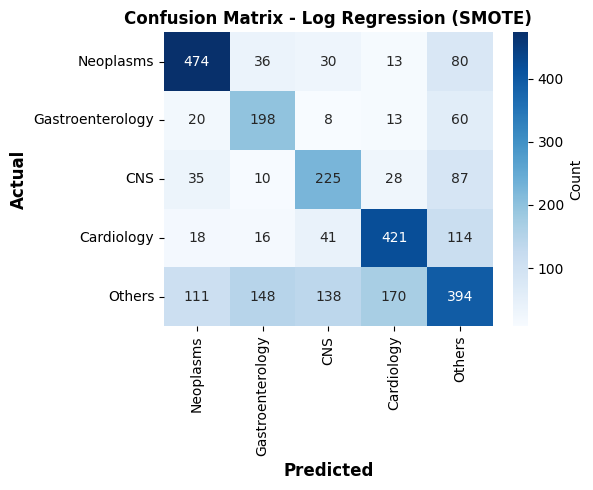

In [21]:
# ================================
# TRAIN ON SMOTE BALANCED DATA
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("="*60)
print("🚀 TRAINING LOG REGRESSION ON SMOTE BALANCED DATA")
print("="*60)

lr_bal = LogisticRegression(max_iter=1000, random_state=42)
lr_bal.fit(X_train_tfidf_balanced, y_train_balanced)
print("✓ Training complete")

# Evaluate on original test set (DO NOT balance/fit again)
y_pred = lr_bal.predict(X_test_tfidf)
print("✓ Predictions complete")

# Define class names for the 5 conditions
class_names = ['Neoplasms', 'Gastroenterology', 'CNS', 'Cardiology', 'Others']

print("\n" + "="*60)
print("📊 CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=class_names))

print("\n" + "="*60)
print("📈 CONFUSION MATRIX")
print("="*60)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Log Regression (SMOTE)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


### **SMOTE didn't improve results:** for several reasons

**1. High-dimensional sparse data problem**
TF-IDF creates 10,000-dimensional sparse vectors where most values are zero. SMOTE generates synthetic samples by interpolating between existing points in this space, creating "artificial" text representations that don't correspond to real medical language patterns. These synthetic vectors may not be linguistically meaningful.

**2. Class overlap in feature space**
Medical conditions share terminology (procedures, symptoms). For example, "cardiovascular" terms appear in Cardiology but also in Others and CNS (stroke). SMOTE creates more overlapping synthetic samples in already-confusing regions, making boundaries harder to learn.

**3. "Others" class is too broad**
Contains diverse conditions that don't cluster well. SMOTE tries to balance it  but creates even more noise within that class.

**4. Lost information from majority classes**
Before SMOTE, the model could learn well from the 961 real "Others" samples. After SMOTE, it now trains on 961 real + #s synthetic samples from minority classes. The model overfits to synthetic patterns that don't exist in real test data.

## Better Alternatives to SMOTE:

1. **Class weights:** no synthetic data, just penalizes misclassifications differently.

2. **Stratified sampling:** already done in train_test_split with `stratify=y`

3. **Focus on better features:** bigrams, increased max_features to 15k, domain embeddings

4. **Ensemble methods** that handle imbalance naturally (Random Forest with `class_weight='balanced'`, XGBoost with `scale_pos_weight`)

**Recommendation:** Remove SMOTE & use `class_weight='balanced'` with the classifiers instead—it adjusts the loss function without creating fake data Ignore the SMOTE variables (X_train_tfidf_balanced, y_train_balanced) and train models using the original data with class weights

In [ ]:
'''
# ==================
#   CLASS WEIGHTS
# ==================

# Use original TRAINING DATA + class weights
lr_bal = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_bal.fit(X_train_tfidf, y_train)  # Original, not _balanced

# Evaluate on TEST DATA
y_pred = lr_bal.predict(X_test_tfidf)
'''

## **5. Build and Evaluate the Algorithms**
> #### 5.1 Define a list of Classifiers:
**`random_state=42`** fixes the seed of the random number generator so the training process becomes reproducible: every run uses the same data shuffling, splits, and model initialization, which makes debugging and comparing models fair & consistent.
> #### 5.2 Train and evaluate the models in a loop with a progress bar  

> 🚩 **NOTE: XGBoost Error**‼️, **`XGBoost`**: expects class labels to start at 0, but df labels are 1, 2, 3, 4, 5.

> To fix it, **labels were remapped with a label encoder so they become 0-4 instead of 1-5**. Then, for the 3-boosting models **(XGBoost, LightGBM, CatBoost)**, the training & evaluation use these encoded labels, while the other models still use the original labels. This allows models to be trained and compared on the same data.

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# ================================================
# REMAP LABELS FOR XGBOOST COMPATIBILITY
# ================================================
le = LabelEncoder()
y_train_balanced_encoded = le.fit_transform(y_train_balanced)
y_test_encoded = le.transform(y_test)

# ================================================
# DEFINE CLASSIFIERS FOR MULTICLASS CLASSIFICATION
# ================================================
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Create a list to store the results
results_list = []

# ================================================
# LOOP THROUGH CLASSIFIERS WITH PROGRESS BAR
# ================================================
for name, clf in tqdm(classifiers.items(), desc="Training models", total=len(classifiers)):
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")

    # Use encoded labels for XGBoost, LightGBM, CatBoost
    if name in ["XGBoost", "LightGBM", "CatBoost"]:
        y_train_use = y_train_balanced_encoded
        y_test_use = y_test_encoded
    else:
        y_train_use = y_train_balanced
        y_test_use = y_test

    # Train the classifier on SMOTE-balanced data
    clf.fit(X_train_tfidf_balanced, y_train_use)
    print("✓ Training complete")

    # Make predictions on ORIGINAL test data (not SMOTE'd)
    y_pred = clf.predict(X_test_tfidf)
    print("✓ Predictions complete")

    # Calculate evaluation metrics for multiclass
    accuracy = accuracy_score(y_test_use, y_pred)
    precision = precision_score(y_test_use, y_pred, average='weighted')
    recall = recall_score(y_test_use, y_pred, average='weighted')
    f1 = f1_score(y_test_use, y_pred, average='weighted')

    # ROC-AUC for multiclass (one-vs-rest)
    try:
        y_pred_proba = clf.predict_proba(X_test_tfidf)
        roc_auc = roc_auc_score(y_test_use, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = None

    # Print results immediately
    print(f"\nResults for {name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}" if roc_auc else "  ROC-AUC:   N/A")

    # Add the results to the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc if roc_auc else 0.0
    })

# Create DataFrame from the list
results = pd.DataFrame(results_list)

# Sort the results by F1-score
results = results.sort_values(by='F1-score', ascending=False)

print(f"\n{'='*60}")
print("FINAL RESULTS (sorted by F1-score) - SMOTE BALANCED")
print(f"{'='*60}\n")
print(results.to_string(index=False))


Training models:   0%|          | 0/8 [00:00<?, ?it/s]


Training: Logistic Regression


Training models:  12%|█▎        | 1/8 [00:08<00:59,  8.47s/it]

✓ Training complete
✓ Predictions complete

Results for Logistic Regression:
  Accuracy:  0.5928
  Precision: 0.5922
  Recall:    0.5928
  F1-score:  0.5878
  ROC-AUC:   0.8258

Training: Multinomial NB
✓ Training complete
✓ Predictions complete

Results for Multinomial NB:
  Accuracy:  0.6018
  Precision: 0.6127
  Recall:    0.6018
  F1-score:  0.5817
  ROC-AUC:   0.8241

Training: Random Forest
✓ Training complete
✓ Predictions complete


Training models:  38%|███▊      | 3/8 [11:10<20:37, 247.56s/it]


Results for Random Forest:
  Accuracy:  0.4903
  Precision: 0.4869
  Recall:    0.4903
  F1-score:  0.4877
  ROC-AUC:   0.7121

Training: Gradient Boosting


Training models:  50%|█████     | 4/8 [19:52<22:49, 342.36s/it]

✓ Training complete
✓ Predictions complete

Results for Gradient Boosting:
  Accuracy:  0.5994
  Precision: 0.5987
  Recall:    0.5994
  F1-score:  0.5986
  ROC-AUC:   0.8304

Training: AdaBoost


Training models:  62%|██████▎   | 5/8 [20:16<11:51, 237.22s/it]

✓ Training complete
✓ Predictions complete

Results for AdaBoost:
  Accuracy:  0.5125
  Precision: 0.5407
  Recall:    0.5125
  F1-score:  0.5164
  ROC-AUC:   0.7704

Training: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:57:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training models:  75%|███████▌  | 6/8 [26:10<09:09, 274.53s/it]

✓ Training complete
✓ Predictions complete

Results for XGBoost:
  Accuracy:  0.5398
  Precision: 0.5403
  Recall:    0.5398
  F1-score:  0.5395
  ROC-AUC:   0.8009

Training: LightGBM
✓ Training complete


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✓ Predictions complete


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
Training models:  88%|████████▊ | 7/8 [28:54<03:59, 239.69s/it]


Results for LightGBM:
  Accuracy:  0.5319
  Precision: 0.5297
  Recall:    0.5319
  F1-score:  0.5305
  ROC-AUC:   0.8116

Training: CatBoost


In [ ]:
'''
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# -------------------------------------------------------------
# 5.0: Remap labels from 1-5 to 0-4 for XGBoost compatibility
# -------------------------------------------------------------
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ----------------------------------------------------------------------
# 5.1: DEFINE CLASSIFIERS WITH class_weight='balanced'
# ----------------------------------------------------------------------
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Multinomial NB": MultinomialNB(),  # doesn't support class_weight
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),  # doesn't support class_weight
    "AdaBoost": AdaBoostClassifier(random_state=42),  # doesn't support class_weight
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1, class_weight='balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced')
}

# Create a list to store the results
results_list = []

# ---------------------------------------------------
# 5.2: LOOP THROUGH ALL CLASSIFIERS WITH PROGRESS BAR
# ---------------------------------------------------
for name, clf in tqdm(classifiers.items(), desc="Training models", total=len(classifiers)):
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")

    if name in ["XGBoost", "LightGBM", "CatBoost"]:
        y_train_use = y_train_encoded
        y_test_use = y_test_encoded
    else:
        y_train_use = y_train
        y_test_use = y_test

    # Train the classifier
    clf.fit(X_train_tfidf, y_train_use)
    print("✓ Training complete")

    # Make predictions on the test data
    y_pred = clf.predict(X_test_tfidf)
    print("✓ Predictions complete")

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_use, y_pred)
    precision = precision_score(y_test_use, y_pred, average='weighted')
    recall = recall_score(y_test_use, y_pred, average='weighted')
    f1 = f1_score(y_test_use, y_pred, average='weighted')

    try:
        y_pred_proba = clf.predict_proba(X_test_tfidf)
        roc_auc = roc_auc_score(y_test_use, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = None

    # Print Results
    print(f"\nResults for {name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}" if roc_auc else "  ROC-AUC:   N/A")

     # Add the results to the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc if roc_auc else 0.0
    })

# Create DataFrame from the list
results = pd.DataFrame(results_list)
results = results.sort_values(by='F1-score', ascending=False)

# Sort the results by ROC-AUC score
print(f"\n{'='*60}")
print("FINAL RESULTS (sorted by F1-score)")
print(f"{'='*60}\n")
print(results.to_string(index=False))
'''


In [ ]:
# =====================
# Plot the results
# =====================

plt.figure(figsize=(8, 4))
sns.barplot(x='ROC-AUC', y='Model', data=results, palette='viridis')
plt.title('Model Comparison - ROC-AUC Score')
plt.xlabel('ROC-AUC Score')
plt.ylabel('Model')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")

# ============================================================
# FIGURES 2 & 3: Metrics Comparison and Heatmap
# ============================================================
fig1 = plt.figure(figsize=(14, 6))

# 2. Bar chart comparing all metrics across models
ax1 = plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
x = np.arange(len(results))
width = 0.15

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, results[metric], width, label=metric, alpha=0.8)

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('All Metrics Comparison Across Models', fontsize=14, fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels(results['Model'], rotation=45, ha='right')
ax1.legend(loc='lower right', fontsize=9)
ax1.set_ylim([0, 1.05])
ax1.grid(axis='y', alpha=0.3)

# 3. Heatmap of all metrics
ax2 = plt.subplot(1, 2, 2)
heatmap_data = results[metrics].T
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=results['Model'], yticklabels=metrics,
            vmin=0, vmax=1, cbar_kws={'label': 'Score'}, ax=ax2, annot_kws={'size': 10})
ax2.set_title('Metrics Heatmap', fontsize=14, fontweight='bold')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:

# ====== Visualizations Side by Side ======

fig = plt.figure(figsize=(20, 10))

# =========================================
# 3. ROC-AUC comparison (top left)
# =========================================
ax1 = plt.subplot(2, 2, 1)
results_sorted = results.sort_values('ROC-AUC', ascending=True)
colors = sns.color_palette("husl", len(results_sorted))
bars = ax1.barh(results_sorted['Model'], results_sorted['ROC-AUC'], color=colors, alpha=0.8)
ax1.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax1.set_title('ROC-AUC Scores by Model', fontsize=14, fontweight='bold')
ax1.set_xlim([0, 1.05])
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, results_sorted['ROC-AUC'])):
    ax1.text(value + 0.01, i, f'{value:.3f}', va='center', fontsize=9)

# ================================================
# 4. Precision vs Recall scatter plot (top right)
# ================================================
ax2 = plt.subplot(2, 2, 2)
scatter = ax2.scatter(results['Recall'], results['Precision'],
                     s=results['F1-score']*700, alpha=0.6,
                     c=range(len(results)),
                     cmap='viridis', edgecolors='black', linewidth=1.5)

# Add model labels with arrows
for i, model in enumerate(results['Model']):
    ax2.annotate(model,
                (results['Recall'].iloc[i], results['Precision'].iloc[i]),
                xytext=(10, 10), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', lw=1))

ax2.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax2.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax2.set_title('Precision vs Recall (bubble size = F1-score)', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_xlim([0.35, 0.65])
ax2.set_ylim([0.35, 0.65])

# Add diagonal reference line
ax2.plot([0.35, 0.65], [0.35, 0.65], 'r--', alpha=0.5, linewidth=1, label='Precision = Recall')
ax2.legend(loc='lower right', fontsize=8)

# ================================================
# 5. Radar chart for top 3 models (bottom left)
# ================================================
ax3 = plt.subplot(2, 2, 3, projection='polar')
top_3 = results.sort_values('F1-score', ascending=False).head(3)
categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Plot each of the top 3 models
for idx, (i, row) in enumerate(top_3.iterrows()):
    values = row[metrics].values.tolist()
    values += values[:1]
    ax3.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax3.fill(angles, values, alpha=0.15)

ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(categories, fontsize=10)
ax3.set_ylim(0, 1)
ax3.set_title('Top 3 Models - Radar Chart', fontsize=14, fontweight='bold', pad=20)
ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=9, frameon=True)
ax3.grid(True)

# ================================================
# 6. F1-Score ranking (bottom right)
# ================================================
ax4 = plt.subplot(2, 2, 4)
results_sorted_f1 = results.sort_values('F1-score', ascending=True)
colors_f1 = sns.color_palette("coolwarm", len(results_sorted_f1))
bars = ax4.barh(results_sorted_f1['Model'], results_sorted_f1['F1-score'],
                color=colors_f1, alpha=0.8)
ax4.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax4.set_title('F1-Score Ranking', fontsize=14, fontweight='bold')
ax4.set_xlim([0, 1.05])
ax4.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, results_sorted_f1['F1-score'])):
    ax4.text(value + 0.01, i, f'{value:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()
